# **Network Intrusion Detection System**

- UGR Network Dataset

Perform the project as follows;

- Data Analysis
- Preprocess Data
- Get Insights
- Save Sample of DAta
- Machine Learning Models
  - Supervised
      - Random Forest Model
      - Decision Tree Algorithm
      -
  -  Autoencoders - - - Anomaly Detection


In [71]:
import os

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

Load Data and Get Basic inghts

In [72]:
import os
# Mounting Google Drive to access data
drive.mount('/content/drive')

# Define the file path /content/drive/MyDrive/azizah_alqahtani_project/UGR/ UGR_sample_5M.csv
file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")

ugr_df = pd.read_csv(file_path)

# Inspect the columns of the DataFrame
print(ugr_df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File exists.
Index(['date_time', 'duration', 'source_ip', 'destination_ip', 'source_port',
       'destination_port', 'protocol', 'flag', 'forwarding_status', 'tos',
       'packets', 'bytes', 'label'],
      dtype='object')


In [73]:
ugr_df.columns = ['date_time', 'duration', 'source_ip', 'destination_ip', 'source_port',
       'destination_port', 'protocol', 'flag', 'forwarding_status', 'tos',
       'packets', 'bytes', 'label']

In [74]:
ugr_df.head()

,date_time,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes,label
0,27/07/2016 23:18,0.000,42.219.154.122,223.114.21.40,110,60245,TCP,.AP...,0,2,1,66,background
1,27/07/2016 17:13,1.448,193.27.83.86,42.219.156.212,25,37858,TCP,.AP.SF,0,0,17,1725,anomaly-spam
2,27/07/2016 16:48,0.124,79.180.132.76,42.219.155.56,41961,80,TCP,.AP.SF,0,0,36,2534,background
3,28/07/2016 1:37,8.955,42.219.156.28,209.85.225.27,4842,25,TCP,....S.,0,0,6,288,nerisbotnet
4,27/07/2016 19:59,0.000,201.112.181.230,42.219.157.23,38038,80,TCP,.A...F,0,0,1,52,background


In [75]:
ugr_df.tail()

,date_time,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes,label
30965,28/07/2016 0:02,0.000,42.219.158.16,42.219.150.246,80,14748,TCP,.A..S.,0,0,1,40,dos
30966,27/07/2016 14:59,0.212,43.164.44.54,42.219.159.85,443,26826,TCP,.AP..F,0,0,4,263,background
30967,27/07/2016 16:30,0.000,42.219.159.93,220.20.177.61,58211,80,TCP,.A....,0,0,1,41,background
30968,28/07/2016 4:41,0.692,42.219.156.213,193.26.243.174,41098,25,TCP,.APRS.,0,0,6,439,anomaly-spam
30969,27/07/2016 17:20,0.092,42.219.158.188,188.31.29.103,80,41922,TCP,.AP.SF,0,0,5,474,blacklist


**DAta Descriptive Analysis**

In [76]:
ugr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,30970.0,3.254900,27.085456,0.0,0.0,0.144,0.828,1805.85
source_port,30970.0,22441.874588,23796.475220,0.0,80.0,10021.000,47015.250,65522.00
destination_port,30970.0,18409.836874,22877.484658,0.0,80.0,2041.500,41874.250,65511.00
forwarding_status,30970.0,0.000000,0.000000,0.0,0.0,0.000,0.000,0.00
tos,30970.0,5.658734,18.687942,0.0,0.0,0.000,0.000,202.00
packets,30970.0,20.599709,933.252757,1.0,1.0,2.000,6.000,81120.00
bytes,30970.0,13396.947046,736748.304573,29.0,73.0,200.000,942.000,63282491.00


In [77]:
ugr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30970 entries, 0 to 30969
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          30970 non-null  object 
 1   duration           30970 non-null  float64
 2   source_ip          30970 non-null  object 
 3   destination_ip     30970 non-null  object 
 4   source_port        30970 non-null  int64  
 5   destination_port   30970 non-null  int64  
 6   protocol           30970 non-null  object 
 7   flag               30970 non-null  object 
 8   forwarding_status  30970 non-null  int64  
 9   tos                30970 non-null  int64  
 10  packets            30970 non-null  int64  
 11  bytes              30970 non-null  int64  
 12  label              30970 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.1+ MB


Null values in data

In [78]:
# Finding the number of null values in each column
null_values_count = ugr_df.isnull().sum()

# printing the null values count
print("Null Values Count Per Column:")
print("-" * 30)
for column, count in null_values_count.items():
    print(f"{column}: {count}")
print("-" * 30)

Null Values Count Per Column:
------------------------------
date_time: 0
duration: 0
source_ip: 0
destination_ip: 0
source_port: 0
destination_port: 0
protocol: 0
flag: 0
forwarding_status: 0
tos: 0
packets: 0
bytes: 0
label: 0
------------------------------


Duplicates Entries in Data

In [79]:
duplicates = ugr_df.duplicated()
duplicates_count = duplicates.sum()
print(f"Total Duplicated Entries: {duplicates_count}")

Total Duplicated Entries: 5794


**Exploratory Data Analysis**

In [80]:
ugr_df['date_time'] = pd.to_datetime(ugr_df['date_time'])
ugr_df = ugr_df.sort_values(by='date_time')

<ipython-input-80-d0116c16057e>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ugr_df['date_time'] = pd.to_datetime(ugr_df['date_time'])


In [81]:
start_date = ugr_df['date_time'].min()
end_date = ugr_df['date_time'].max()

# printing the date range
print(f"Data Date-Time Range:")
print("-" * 30)
print(f"Start Date: {start_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End Date: {end_date.strftime('%Y-%m-%d %H:%M:%S')}")
print("-" * 30)

Data Date-Time Range:
------------------------------
Start Date: 2016-07-27 13:43:00
End Date: 2016-07-28 09:43:00
------------------------------


Daily Packets and Bytes Volume Analysis

In [82]:
aggregated_data = ugr_df.resample('D', on='date_time').agg({'packets':'sum', 'bytes':'sum'})
aggregated_data

,packets,bytes
date_time,,
2016-07-27,161451,91402417
2016-07-28,476522,323501033


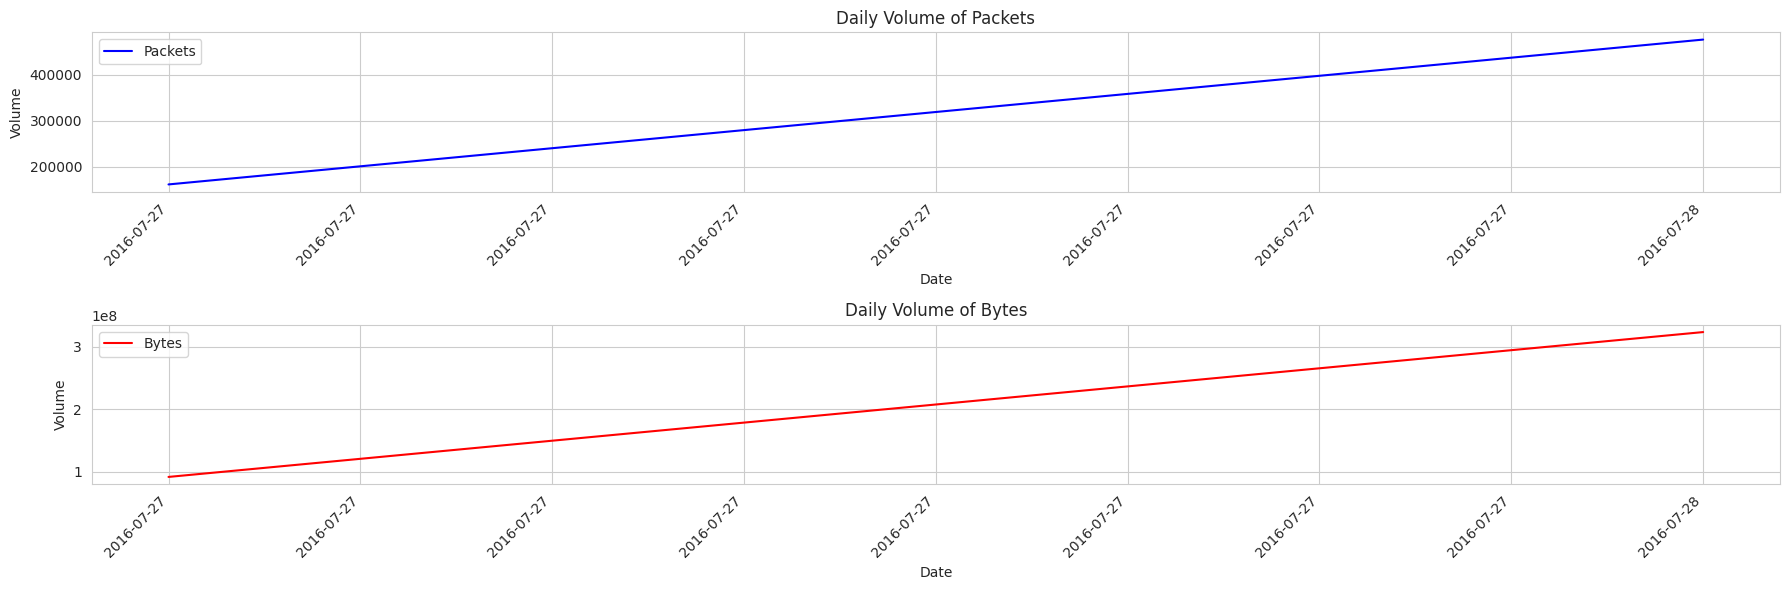

In [83]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

# Plotting the daily volume of packets
axs[0].plot(aggregated_data.index, aggregated_data['packets'], label='Packets', color='blue')
axs[0].set_title('Daily Volume of Packets')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume')
axs[0].legend()
axs[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right")

# Plotting the daily volume of bytes
axs[1].plot(aggregated_data.index, aggregated_data['bytes'], label='Bytes', color='red')
axs[1].set_title('Daily Volume of Bytes')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()
axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

**Protocol Usage Over Time**

In [84]:
protocol_time_series = ugr_df.groupby([pd.Grouper(key='date_time', freq='D'), 'protocol']).size().unstack(fill_value=0)
protocol_time_series

protocol,ESP,GRE,ICMP,IPIP,TCP,UDP
date_time,,,,,,
2016-07-27,1,14,96,4,9872,3065
2016-07-28,7,4,76,0,14305,3526


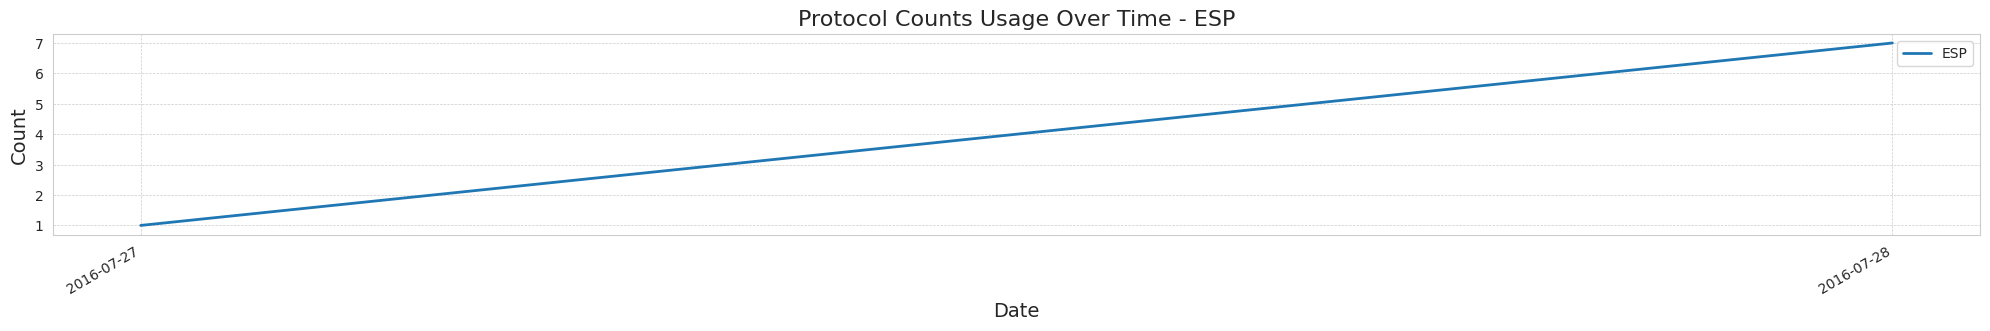

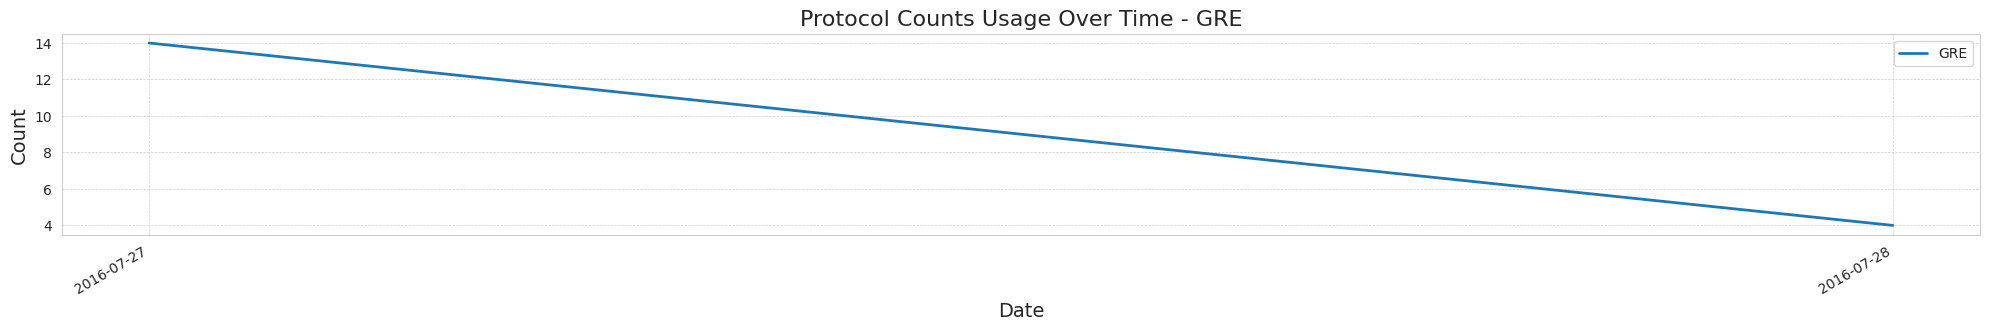

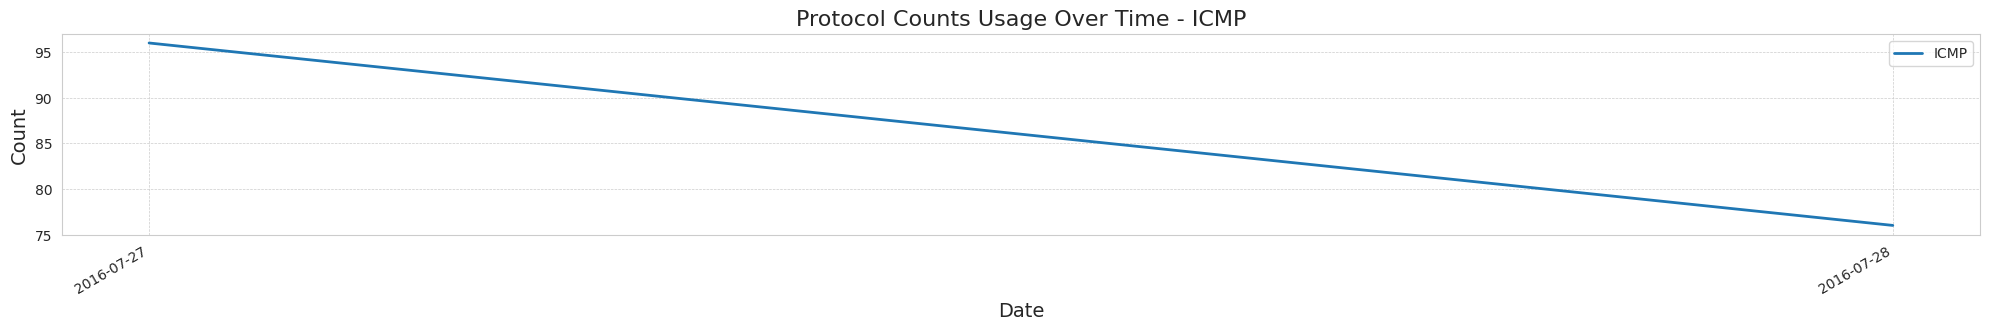

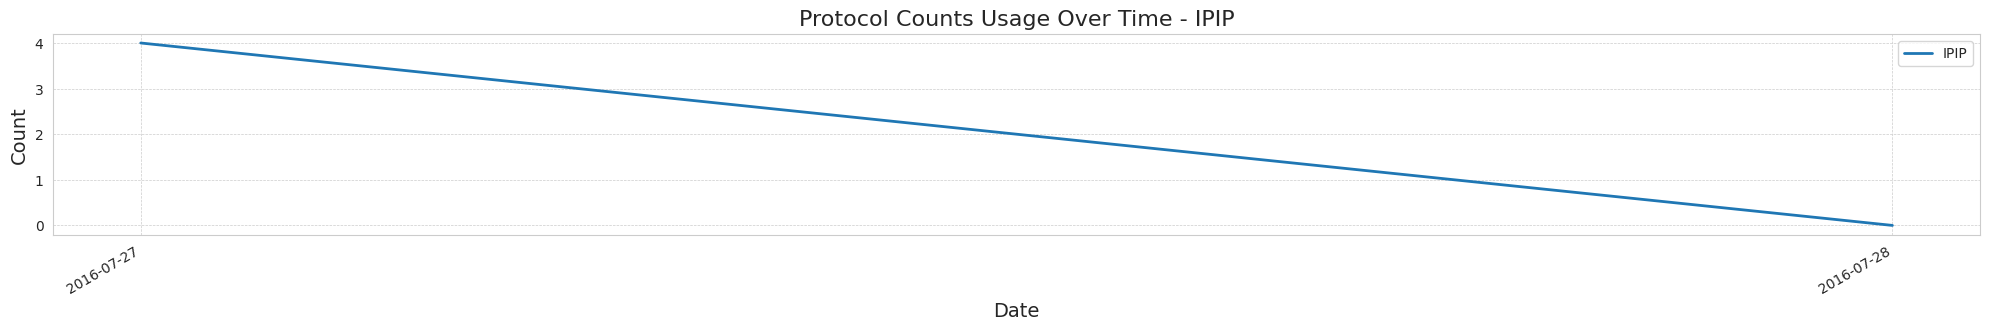

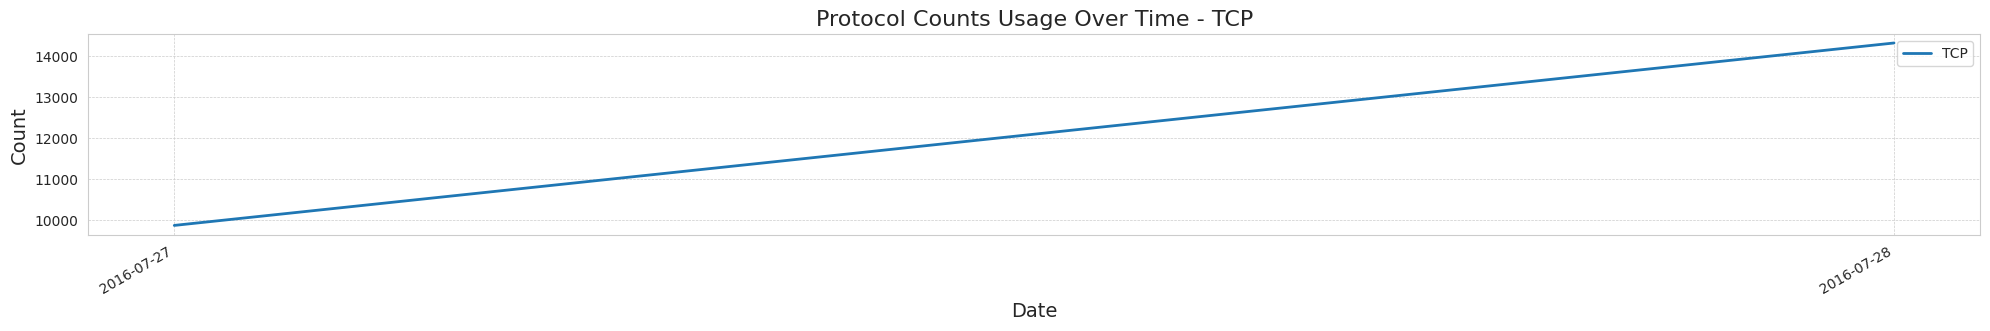

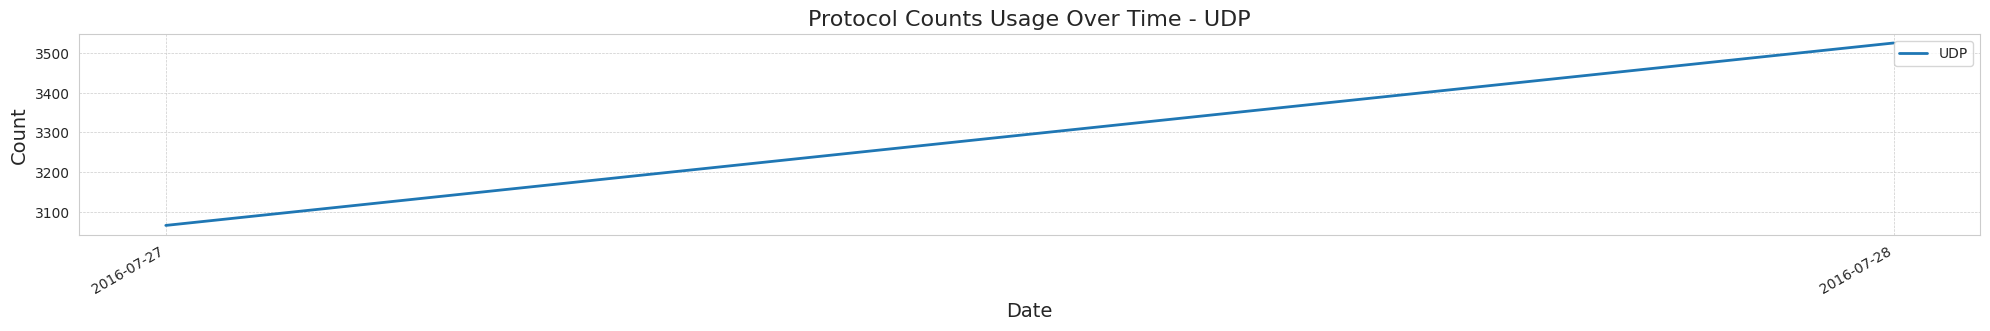

In [85]:
fig_size = (20, 3)
for protocol in protocol_time_series.columns:
    plt.figure(figsize=fig_size)
    plt.plot(protocol_time_series.index, protocol_time_series[protocol], label=protocol, linewidth=2)
    plt.title(f'Protocol Counts Usage Over Time - {protocol}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.show()

For date-time range from July 27, 2016, to July 31, 2016, we can interpret and compare the usage over time of the different network protocols as follows:

- On July 27, TCP was the most utilized protocol, with UDP being the next most used but at a lower level. The remaining protocols were used much less, with ESP having very low usage and IPv6 being the least used.

- On July 28, all protocols experienced an increase in usage. TCP usage more than doubled and remained the highest. UDP also had a significant rise. ICMP usage increased noticeably, as did ESP. Both GRE and IPIP usage grew, with IPv6 seeing an increase, although it remained the least used.

- July 29 saw counts for TCP and UDP that were close to those on July 28, with TCP maintaining a slight edge over UDP. ICMP usage experienced a small increase. Slight growth was also noted in GRE and IPIP usage.

- On July 30, there was a reduction in TCP usage, and UDP saw a more noticeable decrease. GRE reached its peak usage for the period, while ICMP usage saw a reduction. Minor changes were observed in the usage of the other protocols.

- By July 31, there was a clear decrease in usage across all protocols. TCP saw a notable decrease but still had the highest usage. UDP underwent a significant decline, and ICMP usage dropped markedly. ESP, IPIP, and IPv6 all experienced decreases, with IPv6 remaining the least used.

**Top Active IP Addresses**
- Source IP
- Destination IP

In [86]:
#how many unique IP address - Source
unique_values = len(ugr_df['source_ip'].unique())
print(f"Unique values in Source IP: {unique_values}")

unique_values = len(ugr_df['destination_ip'].unique())
print(f"Unique values in Destination IP: {unique_values}")

Unique values in Source IP: 4288
Unique values in Destination IP: 5317


In [87]:
# Top 20 IP addresses to display
top_n = 20

# Count occurrences for source and destination IPs
source_ip_counts = ugr_df['source_ip'].value_counts().head(top_n)
destination_ip_counts = ugr_df['destination_ip'].value_counts().head(top_n)

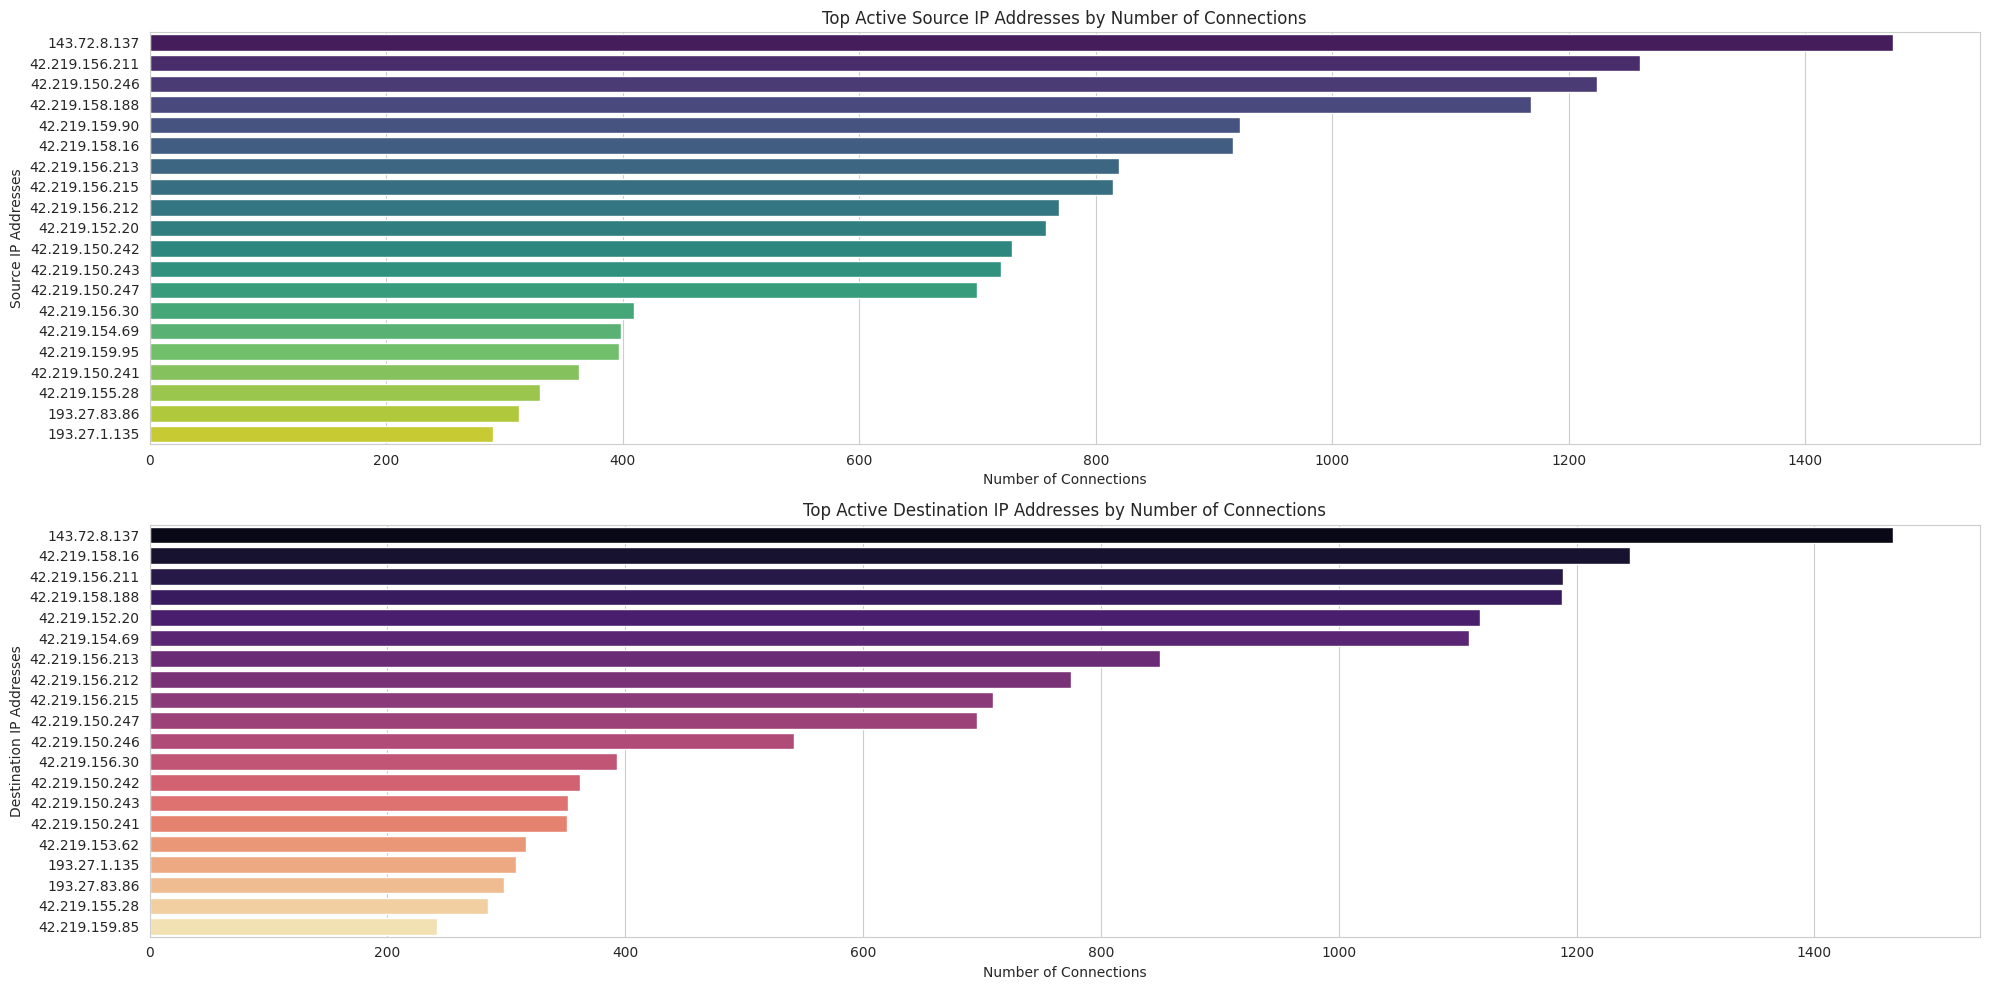

In [88]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Plot for Top Active Source IPs
sns.barplot(x=source_ip_counts.values, y=source_ip_counts.index, palette="viridis", ax=axs[0])
axs[0].set_title('Top Active Source IP Addresses by Number of Connections')
axs[0].set_xlabel('Number of Connections')
axs[0].set_ylabel('Source IP Addresses')

# Plot for Top Active Destination IPs
sns.barplot(x=destination_ip_counts.values, y=destination_ip_counts.index, palette="magma", ax=axs[1])
axs[1].set_title('Top Active Destination IP Addresses by Number of Connections')
axs[1].set_xlabel('Number of Connections')
axs[1].set_ylabel('Destination IP Addresses')
plt.tight_layout()
plt.show()

**Port Usage Analysis**
- Source Port
- Destination Port

In [89]:
# Count occurrences of each source port
source_port_counts = ugr_df['source_port'].value_counts().head(20)
# Count occurrences of each destination port
destination_port_counts = ugr_df['destination_port'].value_counts().head(20)

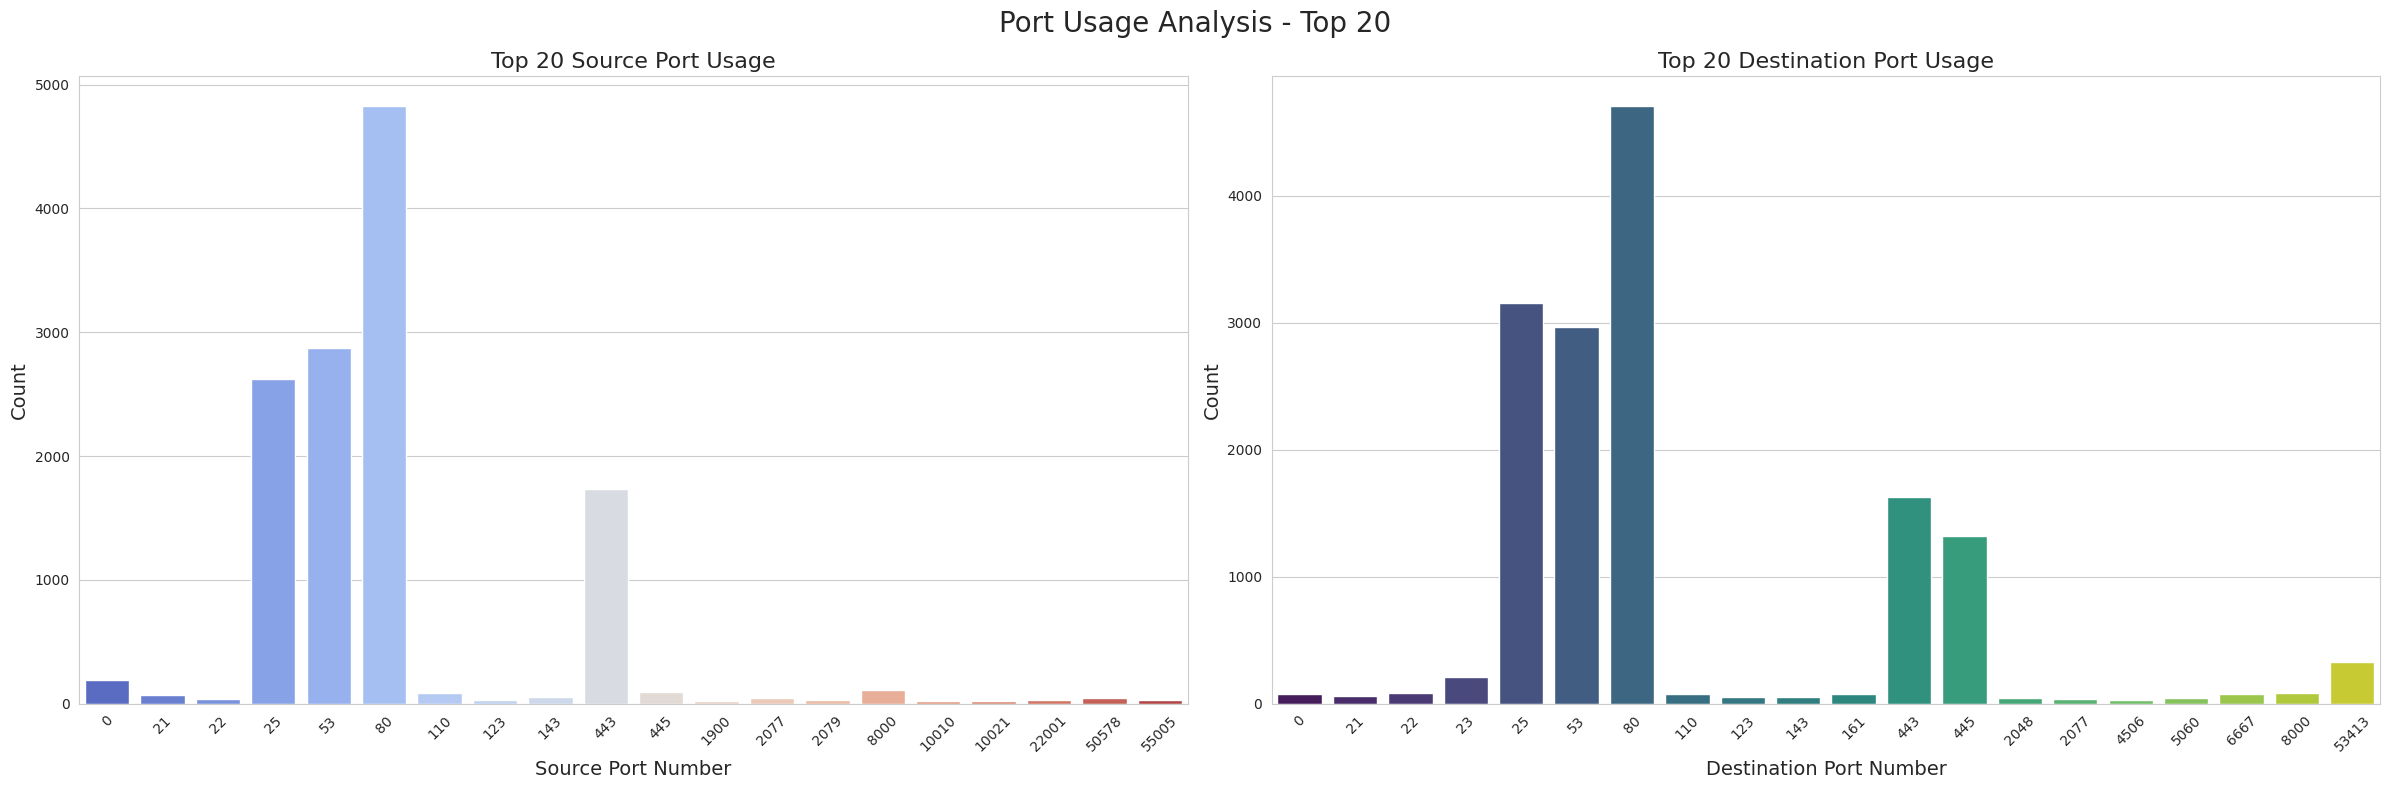

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Source Ports
sns.barplot(x=source_port_counts.index, y=source_port_counts.values, palette="coolwarm", ax=axs[0])
axs[0].set_title('Top 20 Source Port Usage', fontsize=16)
axs[0].set_xlabel('Source Port Number', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)

# Plot for Destination Ports
sns.barplot(x=destination_port_counts.index, y=destination_port_counts.values, palette="viridis", ax=axs[1])
axs[1].set_title('Top 20 Destination Port Usage', fontsize=16)
axs[1].set_xlabel('Destination Port Number', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)

plt.suptitle('Port Usage Analysis - Top 20', fontsize=20)
plt.tight_layout()
plt.show()

**Flags Analysis**

In [91]:
flag_counts = ugr_df['flag'].value_counts()

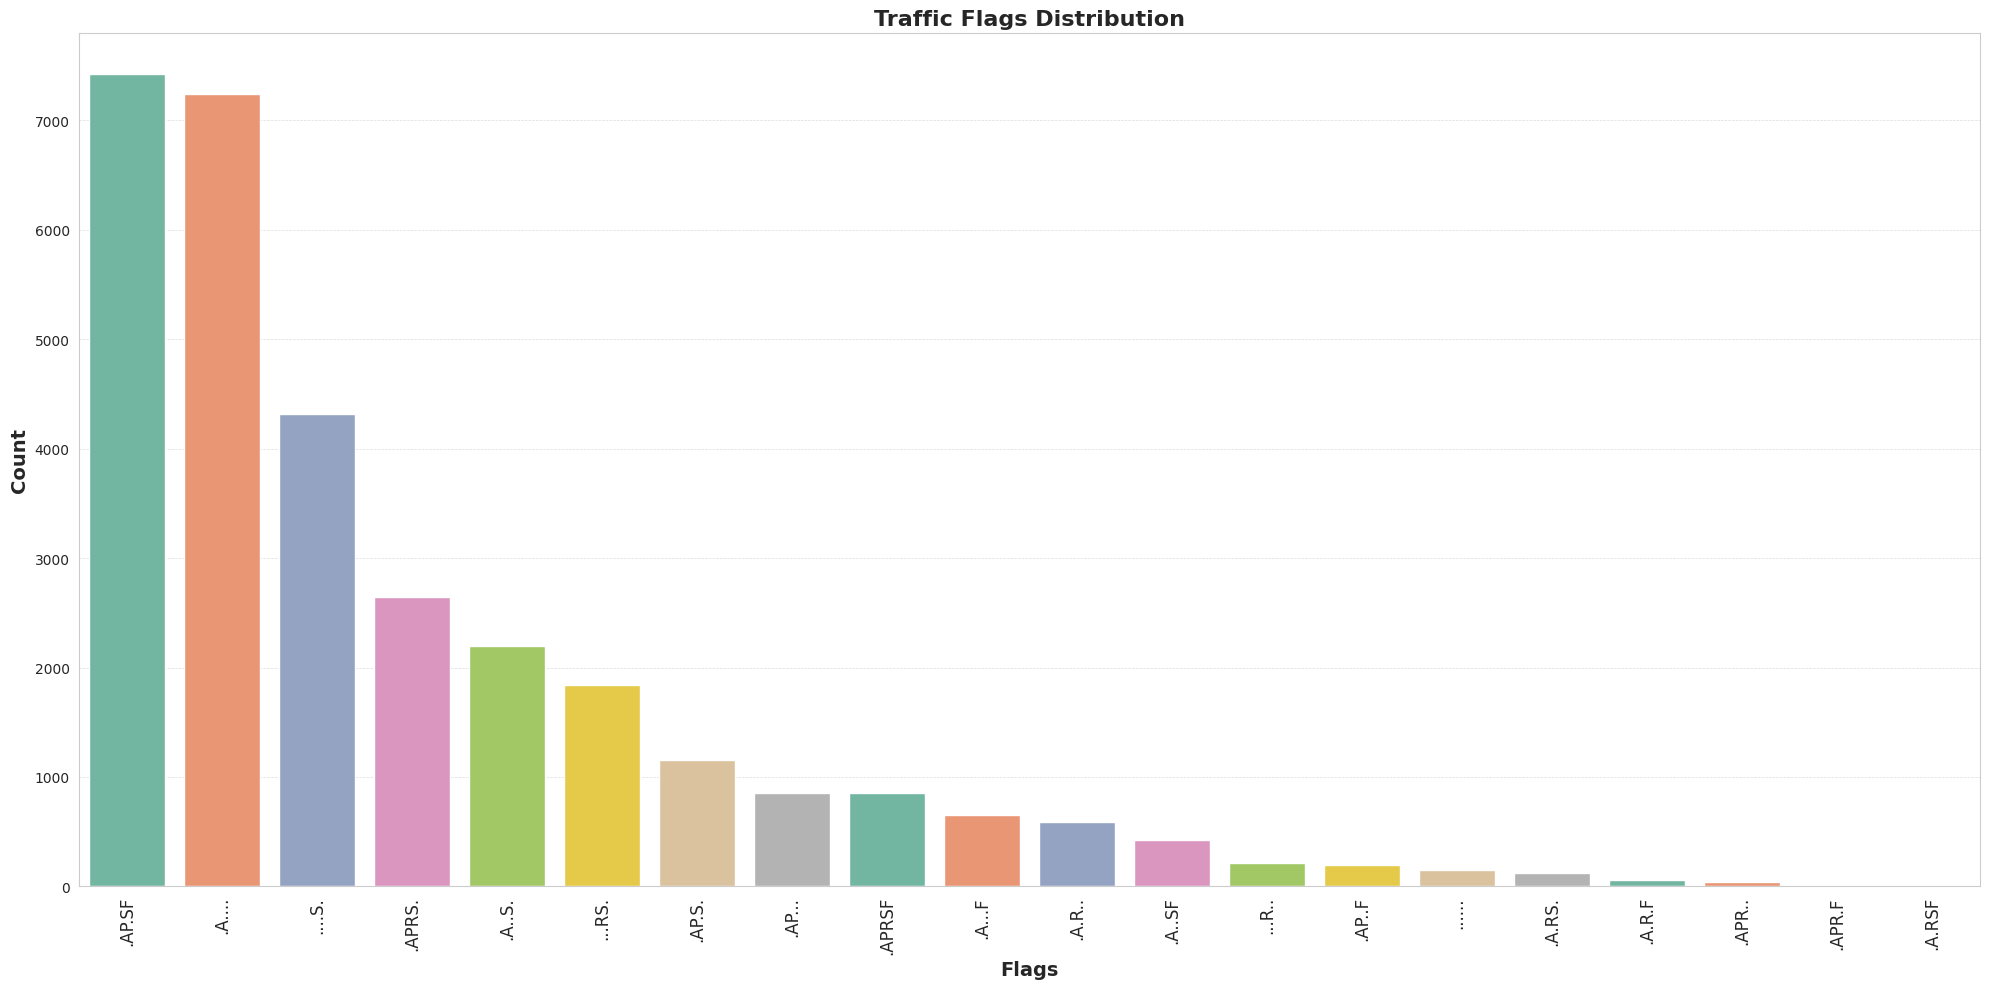

In [92]:
plt.figure(figsize=(20, 10))
sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="Set2")

plt.title('Traffic Flags Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Flags', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

**Duration Analysis**

In [93]:
non_background_data = ugr_df[ugr_df['label'] != 'background']

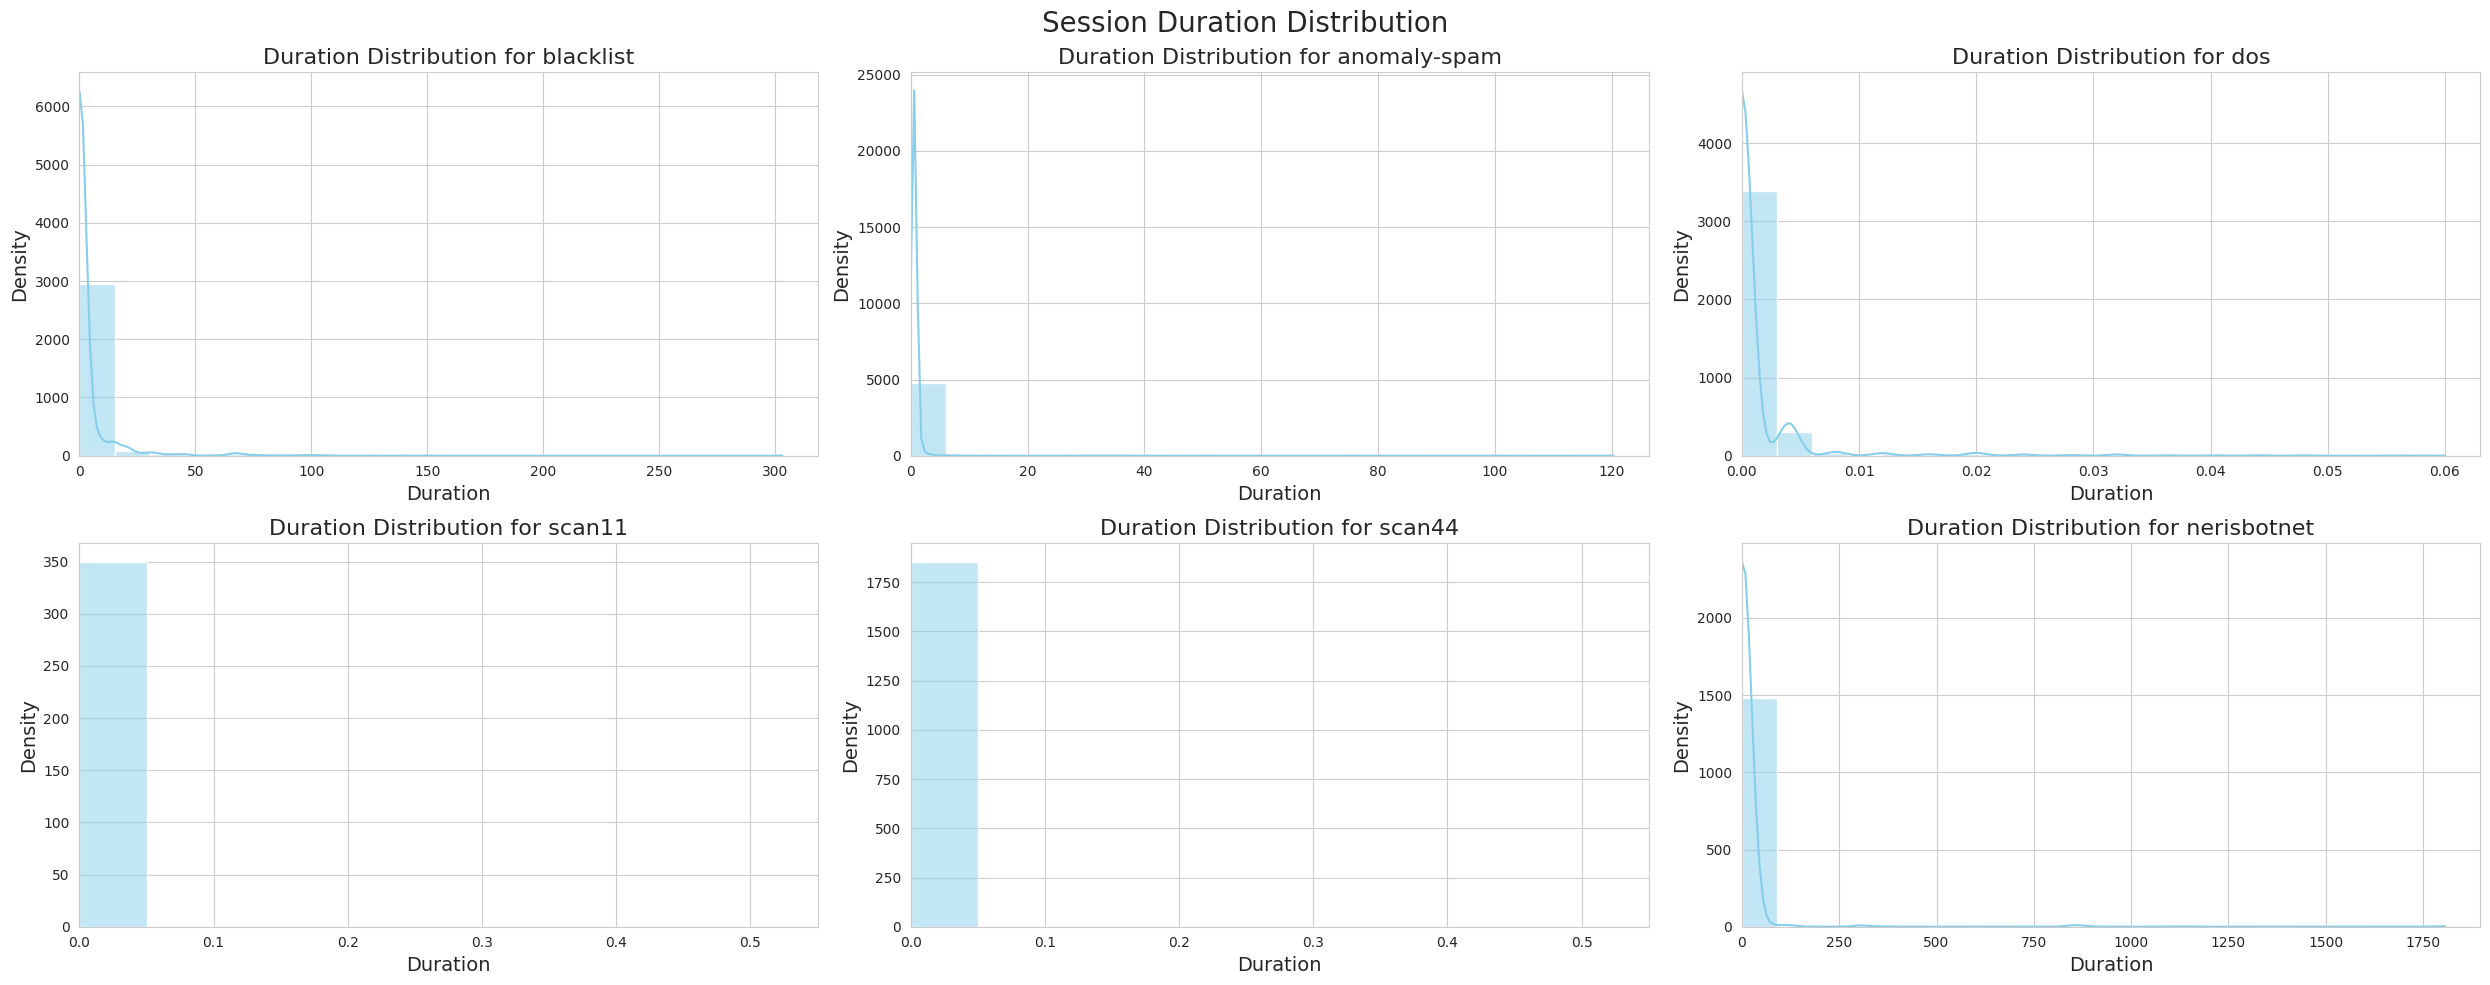

In [94]:
unique_labels = non_background_data['label'].unique()

n_labels = len(unique_labels)
n_cols = 3
n_rows = (n_labels + n_cols - 1) // n_cols

plt.figure(figsize=(25, n_rows * 5))

for i, label in enumerate(unique_labels, 1):
    plt.subplot(n_rows, n_cols, i)
    label_data = non_background_data[non_background_data['label'] == label]

    sns.histplot(label_data['duration'], kde=True, color='skyblue', bins=20)
    plt.title(f'Duration Distribution for {label}', fontsize=16)
    plt.xlabel('Duration', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xlim(left=0)
plt.suptitle('Session Duration Distribution', fontsize=20)
plt.tight_layout()
plt.show()

Data Statistical Distribution Over Each Label

In [95]:
grouped_data = non_background_data.groupby('label')
label_descriptions = {}
for label, group in grouped_data:
    label_descriptions[label] = group.describe()
for label, description in label_descriptions.items():
    print(f"\nStatistics for label '{label}':")
    print(description)


Statistics for label 'anomaly-spam':
                           date_time     duration   source_port  \
count                           4826  4826.000000   4826.000000   
mean   2016-07-27 23:01:51.533360896     0.732952  23816.906962   
min              2016-07-27 16:11:00     0.000000     25.000000   
25%              2016-07-27 19:46:00     0.520000     25.000000   
50%              2016-07-27 22:59:00     0.568000  33110.500000   
75%              2016-07-28 02:12:30     0.700000  47341.750000   
max              2016-07-28 05:58:00   120.316000  60999.000000   
std                              NaN     2.443996  24199.963623   

       destination_port  forwarding_status          tos      packets  \
count       4826.000000             4826.0  4826.000000  4826.000000   
mean       23122.072938                0.0     0.716121     6.159138   
min           25.000000                0.0     0.000000     1.000000   
25%           25.000000                0.0     0.000000     5.000000  

**Duration:**
The 'dos' label has a very short duration, with a mean of 0.000681 and a maximum of 0.076.
On the other hand, the 'nerisbotnet' label has a longer duration, with a mean of 9.92 and a maximum of 1805.85.

**Source Port and Destination Port:**
There are variations in the range of source and destination ports across different labels. For example, 'anomaly-spam' has higher source and destination ports compared to 'scan11'.

**Packets and Bytes:**
'blacklist' has the highest mean number of packets and bytes compared to other labels, indicating potentially more substantial traffic.
'scan11' and 'scan44' have very low mean numbers of packets and bytes compared to other labels, suggesting potentially less intense scanning activities.

**TOS (Type of Service):**
The 'anomaly-spam' label has a non-zero mean TOS value, while other labels have a mean TOS of zero, indicating potential differences in the type of service for this label.

**Forwarding Status:**
All labels have a forwarding status of 0, indicating no forwarding.

**Temporal Heatmap of Activity**

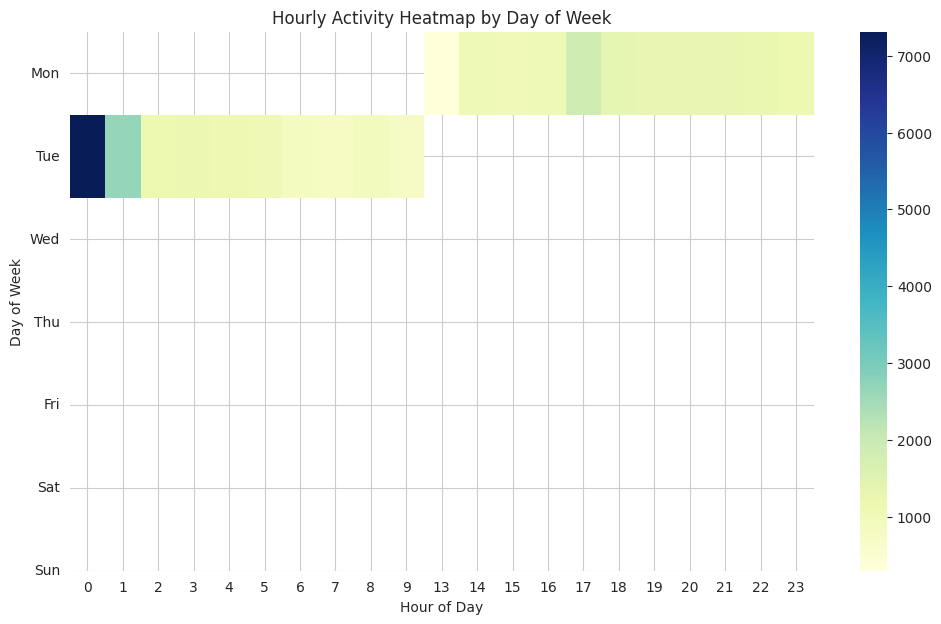

In [96]:
ugr_df['hour'] = ugr_df['date_time'].dt.hour
ugr_df['day_of_week'] = ugr_df['date_time'].dt.dayofweek
heatmap_data = ugr_df.groupby(['day_of_week', 'hour']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Hourly Activity Heatmap by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=np.arange(0.5, 7.5), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

Activity is higher in the later hours of the day, particularly between late afternoon and midnight. The darkest shades, indicating the highest activity levels, consistently appear in the evening hours.

- There is a pronounced peak of activity during the evening on Tuesday, which appears to be the time with the highest overall activity within the week.

- Monday and Wednesday evenings also show high activity, although not quite as intense as Tuesday.

- Activity on Thursday and Friday seems to be relatively consistent throughout the day, with a slight increase in the evening, but not as pronounced as the earlier days of the week.

**Forwarding Status**


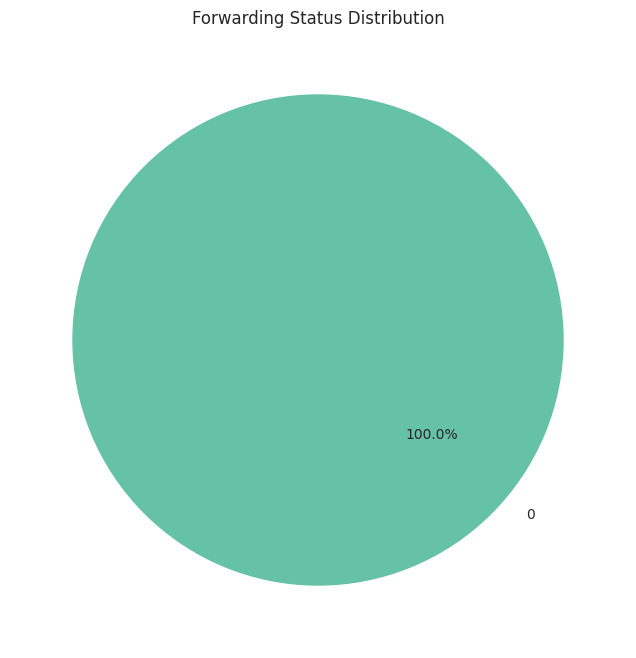

In [97]:
status_counts = ugr_df['forwarding_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Forwarding Status Distribution')
plt.show()

It contains all the same values, 0. So it should be dropped.

In [98]:
ugr_df.drop(columns=['forwarding_status'], inplace=True)

**ToS (Type of Service)**

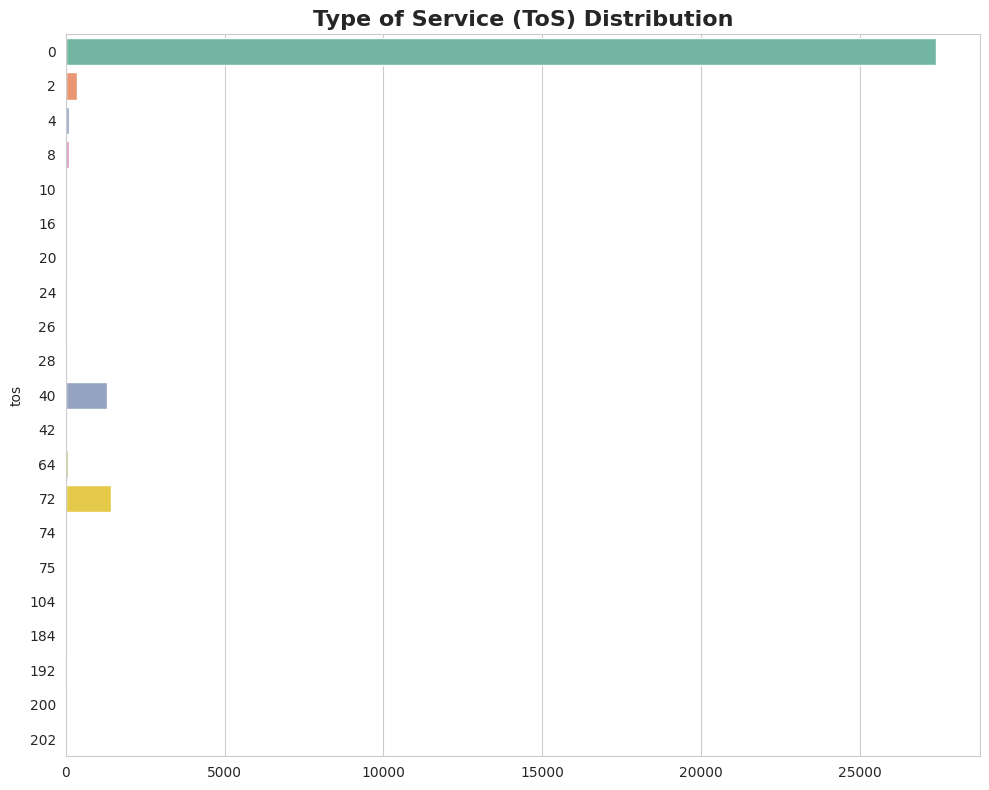

In [99]:
tos_counts = ugr_df['tos'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
sns.barplot(x=tos_counts.values, y=tos_counts.index, palette="Set2", orient='h')
plt.title('Type of Service (ToS) Distribution', fontsize=16, fontweight='bold')
# plt.xlabel('Count', fontsize=14)
# plt.ylabel('ToS Values', fontsize=14)
plt.tight_layout()
plt.show()

**Label Distribution**

Binary Lable Distribution

In [100]:
ugr_df['bin_label'] = np.where(ugr_df['label'] == 'background', 'background', 'attack')

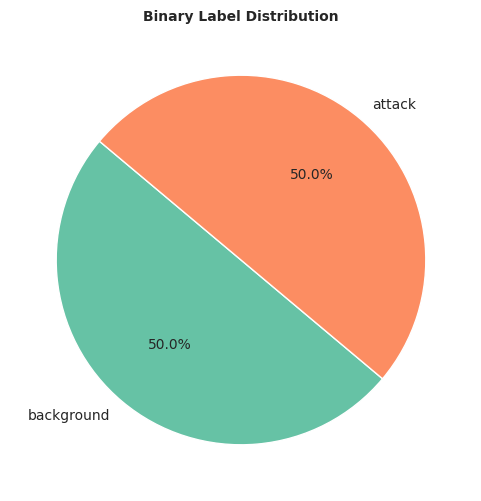

In [101]:
label_counts = ugr_df['bin_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set2"))
plt.title('Binary Label Distribution', fontsize=10, fontweight='bold')
plt.show()

Background is almost 98.6% in our data so is highly available so, we would exclude it from the label distribution and see attacks which is only 1.4% in our data.

Filtered label distribution (excluding 'background'):
label
anomaly-spam    4826
dos             3833
blacklist       3115
scan44          1855
nerisbotnet     1506
scan11           350
Name: count, dtype: int64


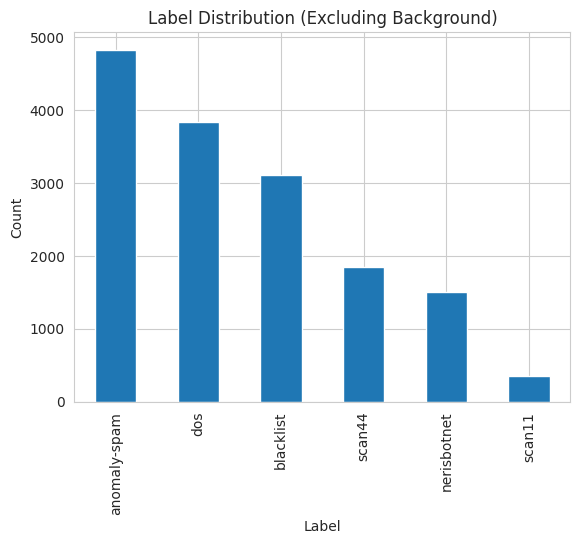

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')

label_counts = ugr_df['label'].value_counts()
label_counts_filtered = label_counts[label_counts.index != 'background']


# Print the filtered label counts
print("Filtered label distribution (excluding 'background'):")
print(label_counts_filtered)

# Plot the filtered label distribution as a bar chart
label_counts_filtered.plot(kind='bar')
plt.title('Label Distribution (Excluding Background)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [103]:
label_counts = ugr_df['label'].value_counts()
label_counts_filtered = label_counts[label_counts.index != 'background']

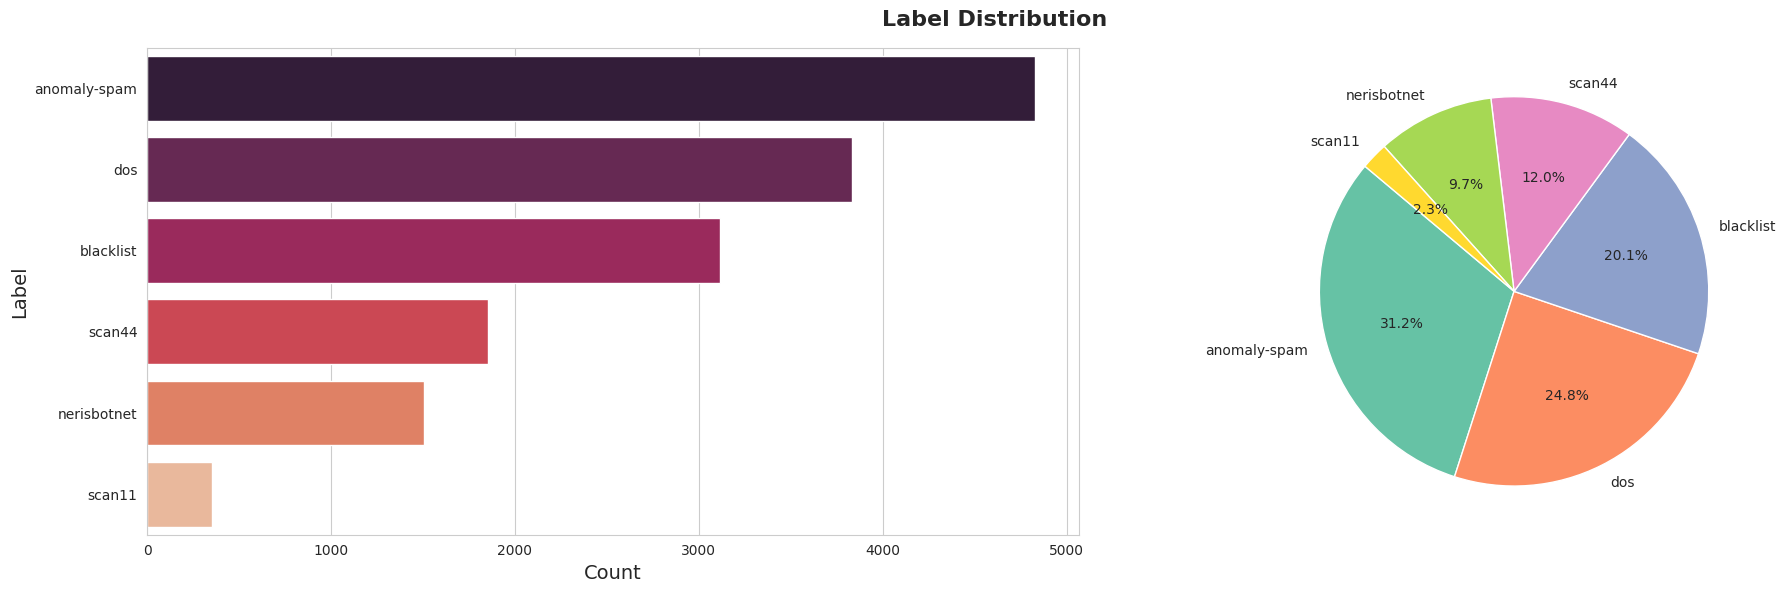

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x=label_counts_filtered.values, y=label_counts_filtered.index, palette="rocket", ax=axs[0])
axs[0].set_xlabel('Count', fontsize=14)
axs[0].set_ylabel('Label', fontsize=14)
axs[1].pie(label_counts_filtered, labels=label_counts_filtered.index,
           autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.suptitle('Label Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In the dataset, 'dos' incidents are the most prevalent, making up just over 40% of the total. 'Blacklist' occurrences are the next most common at around 20%, with 'scan44' not far behind. 'Nerisbotnet' constitutes about 9% of the data. The least common categories are 'anomaly-spam' and 'scan11', with the latter being the smallest segment at 4.1%.

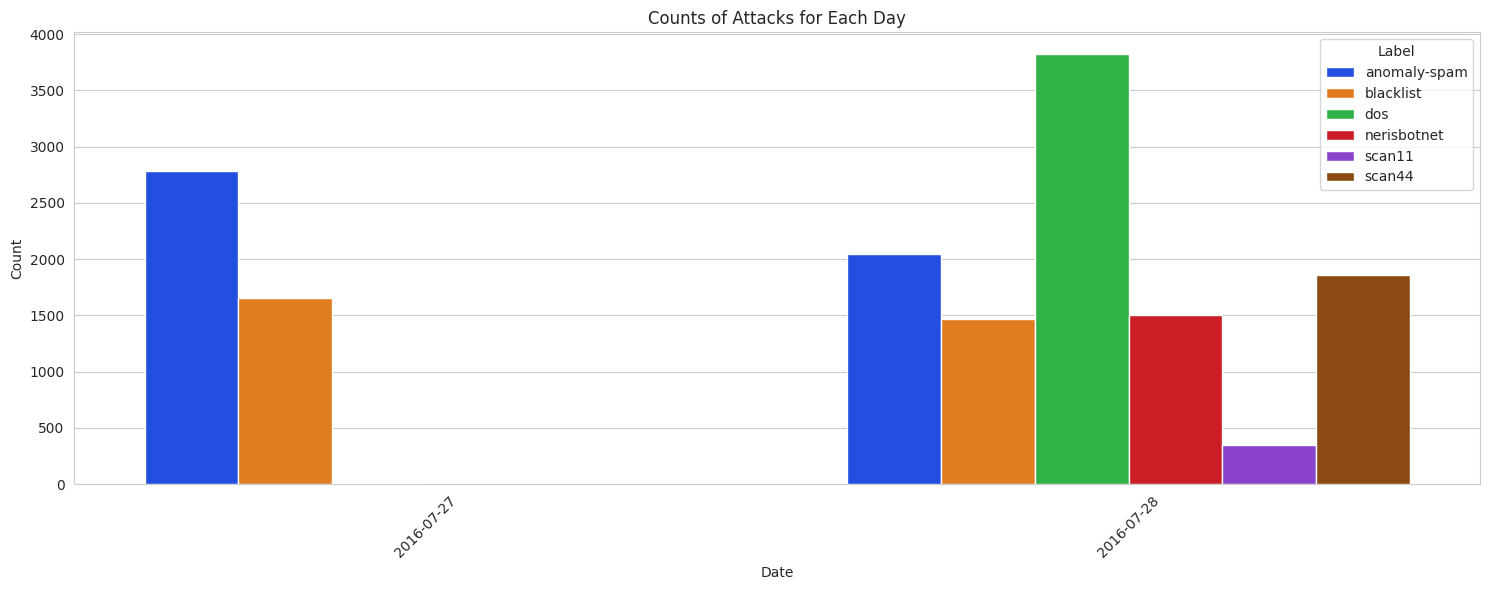

In [105]:
non_background_data = non_background_data.copy()
non_background_data['date'] = non_background_data['date_time'].dt.date
label_counts_by_date = non_background_data[non_background_data['label'] != 'background'].groupby(['date', 'label']).size().reset_index(name='count')
plt.figure(figsize=(15, 6))
sns.barplot(data=label_counts_by_date, x='date', y='count', hue='label', palette='bright')
plt.title('Counts of Attacks for Each Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

**Final Data Label Distribution Statement**

So, the dataset largely consists of benign 'background' activity, constituting 98.6% of the network environment, suggesting a stable and secure setting. However, a small segment, 1.4%, is categorized as 'attack', indicating the presence of network threats. Among these, 'dos' incidents emerge as the most frequent type of attack, although they represent only a fraction of the overall network activity.



So, the original dataset is very large so we will use the only data for date 28,07,2016.

In [106]:
ugr_df.drop(columns=['hour', 'day_of_week'], inplace=True)

In [107]:
ugr_df.dtypes

date_time           datetime64[ns]
duration                   float64
source_ip                   object
destination_ip              object
source_port                  int64
destination_port             int64
protocol                    object
flag                        object
tos                          int64
packets                      int64
bytes                        int64
label                       object
bin_label                   object
dtype: object

Saving the Sample of Data for Our Work

In [108]:
filtered_df = ugr_df[ugr_df['date_time'].dt.date == pd.to_datetime('2016-07-28').date()]

In [109]:
filtered_df['date_time'].dt.date.value_counts() #data for only 2016-07-29

date_time
2016-07-28    17918
Name: count, dtype: int64

In [110]:
import pandas as pd
import os  # Import the os module for directory operations

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')


print(data.columns)

# Define the labels you want to extract
labels_to_extract = ['dos', 'blacklist', 'scan44', 'nerisbotnet', 'anomaly-spam', 'scan11']

# Filter the data to include only the specified labels
labeled_samples = data[data['label'].isin(labels_to_extract)]

# Print the first few rows of the labeled samples to verify the extraction
print(labeled_samples.head())

# Optionally, you can shuffle the labeled samples (recommended)
labeled_samples = labeled_samples.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the save directory
save_dir = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the file path to save the labeled samples
save_path = os.path.join(save_dir, 'labeled_samples.csv')

# Save the labeled samples to the specified file path
labeled_samples.to_csv(save_path, index=False)

print(f"Labeled samples saved to {save_path}")


Index(['date_time', 'duration', 'source_ip', 'destination_ip', 'source_port',
       'destination_port', 'protocol', 'flag', 'forwarding_status', 'tos',
       'packets', 'bytes', 'label'],
      dtype='object')
          date_time  duration      source_ip  destination_ip  source_port  \
1   28/07/2016 4:29     0.540   193.27.1.120  42.219.156.212           25   
3   28/07/2016 0:49     0.000  42.219.156.30  42.219.150.247         7921   
6  27/07/2016 15:31     0.176  194.233.72.92  42.219.158.188        42716   
8   28/07/2016 1:56     0.000  42.219.152.22    143.72.8.137        54427   
9   28/07/2016 4:51     0.540   193.27.1.135  42.219.156.213           25   

   destination_port protocol    flag  forwarding_status  tos  packets  bytes  \
1             40937      TCP  .AP.SF                  0    0        5    961   
3             63479      TCP  .A.R..                  0    0        1     40   
6                80      TCP  .AP...                  0    0       16   1175   
8    

The total number of samples in the dataset: 15485
Label distribution:
label
anomaly-spam    4826
dos             3833
blacklist       3115
scan44          1855
nerisbotnet     1506
scan11           350
Name: count, dtype: int64


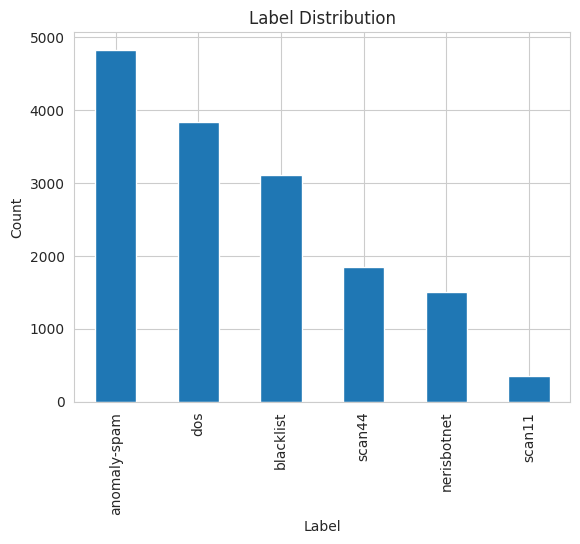

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv')

# Calculate the value counts for the 'label' column
label_counts = data['label'].value_counts()

#Calculate the total number of samples
total_samples = data.shape[0]

# Print the total number of samples
print(f"The total number of samples in the dataset: {total_samples}")

# Print the label distribution
print("Label distribution:")
print(label_counts)

# Plot the label distribution as a bar chart
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [112]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')

# Filter the data to include only the 'background' label
background_data = data[data['label'] == 'background']

# Resample the 'background' data to obtain 68,213 samples
#background_sample = resample(background_data, n_samples=68213, random_state=42)

# Resample the 'background' data to obtain 68,213 samples
background_sample = resample(background_data, n_samples=15485, random_state=42)

# Output the background sample
print(background_sample)

# Optionally, you can save the background sample to a new CSV file
save_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
background_sample.to_csv(save_path, index=False)

print(f"Background sample saved to {save_path}")


              date_time  duration       source_ip   destination_ip  \
14432   28/07/2016 9:13     8.800    104.96.92.60   42.219.159.217   
1678   27/07/2016 19:26     0.000  42.219.154.133     143.72.4.250   
10705  27/07/2016 23:58     0.000   60.242.232.73   42.219.153.164   
26704   28/07/2016 6:16    15.052   42.219.153.27  208.104.183.174   
10296   28/07/2016 0:51     0.000   42.219.157.12    60.11.148.225   
...                 ...       ...             ...              ...   
2519   27/07/2016 16:05     0.000   42.219.159.90  235.218.106.138   
23194   28/07/2016 5:53     0.004    64.208.181.5    42.219.155.28   
9324   27/07/2016 15:20     0.000    42.219.153.7   185.87.151.232   
23532   28/07/2016 9:16     0.144   36.44.243.148    42.219.153.38   
17297   28/07/2016 8:37     4.332  42.219.156.211    42.146.173.79   

       source_port  destination_port protocol    flag  forwarding_status  tos  \
14432           80             51361      TCP  .AP.SF                  0    0 

In [113]:
import pandas as pd

# Load the 'background_sample.csv' file
background_sample = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv')

# Load the 'labeled_samples.csv' file
labeled_samples = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv')

# Concatenate the two dataframes to create a mixed dataset
mixed_dataset = pd.concat([background_sample, labeled_samples])

# Shuffle the mixed dataset
# frac=1 means shuffle the entire dataset, and random_state is used for reproducibility
shuffled_dataset = mixed_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled dataset to a new CSV file
save_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv'
shuffled_dataset.to_csv(save_path, index=False)

print(f"Shuffled mixed dataset saved to {save_path}")


Shuffled mixed dataset saved to /content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv


The total number of samples in the dataset: 30970
Label distribution:
label
background      15485
anomaly-spam     4826
dos              3833
blacklist        3115
scan44           1855
nerisbotnet      1506
scan11            350
Name: count, dtype: int64


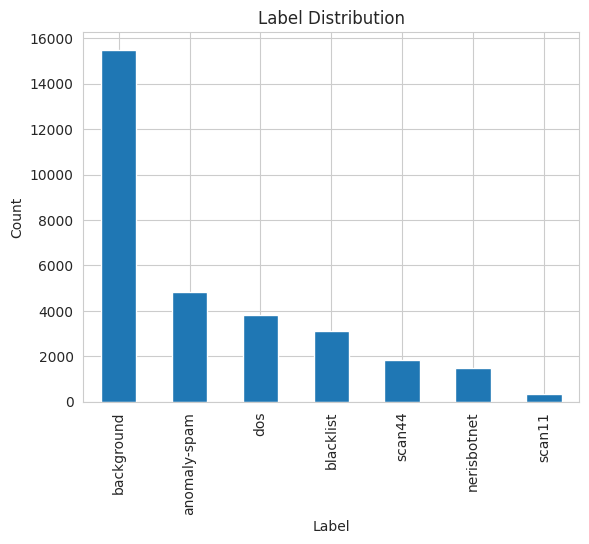

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Calculate the value counts for the 'label' column
label_counts = data['label'].value_counts()

#Calculate the total number of samples
total_samples = data.shape[0]

# Print the total number of samples
print(f"The total number of samples in the dataset: {total_samples}")

# Print the label distribution
print("Label distribution:")
print(label_counts)

# Plot the label distribution as a bar chart
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Label Distribution



Binary Lable Distribution

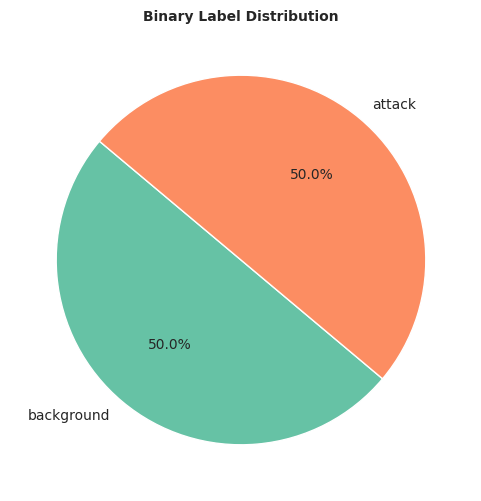

In [115]:

data['bin_label'] = np.where(data['label'] == 'background', 'background', 'attack')
label_counts = data['bin_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set2"))
plt.title('Binary Label Distribution', fontsize=10, fontweight='bold')
plt.show()